# Workflow for Decision Tree Model on Weather Data

## Data Preparation
1. **Import Required Libraries**: Load necessary libraries for data manipulation, visualization, and modeling, including `pandas`, `numpy`, `matplotlib`, and `sklearn`.
2. **Load Scaled Weather Data**: Import the preprocessed dataset containing scaled temperature and weather variables from multiple stations.
3. **Load Answer Dataset**: Import the dataset with labels for 'pleasant' (1) and 'unpleasant' (0) weather days.
4. **Optimize Data**:
   - Create `X` (feature matrix) by dropping `DATE` and `MONTH` columns from the weather data.
   - Prepare `y` (target vector) by dropping the `DATE` column from the answer dataset.
5. **Train-Test Split**: Divide the data into training and testing sets to evaluate model performance on unseen data.

## Decision Tree Model Implementation
6. **Initialize Decision Tree Model**: Instantiate a `DecisionTreeClassifier` with default parameters.
7. **Fit Model on Training Data**: Train the decision tree model using the training subset of `X` and `y`.
8. **Predict Outcomes**:
   - Generate predictions for both training (`y_pred_train`) and testing (`y_pred_test`) datasets.

## Model Evaluation
9. **Cross-Validation**: Conduct cross-validation on the training data to estimate the model's training accuracy.
10. **Classification Reports**:
    - Print the classification report for training data to evaluate precision, recall, and F1-score.
    - Print the classification report for testing data to assess generalization performance.

## Confusion Matrix Analysis
11. **Generate Confusion Matrices**:
    - Loop through each weather station or metric column in `y_test` to calculate individual confusion matrices.
    - Visualize each confusion matrix using `ConfusionMatrixDisplay`.

## Model Simplification (Pruning)
12. **Identify Overfitting**:
    - Analyze discrepancies between training and testing performance.
    - Note any signs of overfitting, such as near-perfect accuracy on training data but significantly lower accuracy on testing data.
13. **Prune the Model**:
    - Adjust hyperparameters such as `max_depth` or `min_samples_split` to simplify the tree.
    - Retrain the decision tree model with the pruned configuration to reduce complexity and improve generalization.

## Visualization and Insights
14. **Decision Tree Visualization**:
    - Plot the structure of the decision tree for interpretability.
    - Highlight key splits and features contributing to predictions.
15. **Confusion Matrix Summary**:
    - Summarize and display confusion matrices for each weather station, comparing true positives, false positives, false negati---ves, and true negatives across stations.

## Challenges & Adjustments
- **Overfitting**: Simplify the model by pruning to balance training and testing performance.
- **Class Imbalance**: Address cases where certain weather conditions dominate, skewing predictions.
- **Cross-Validation**: Optimize model parameters using cross-validation tohis structure further or adjust specific sections!

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn.metrics import classification_report

In [5]:
# Loading the scaled weather data
weather_data_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Data Sets\01 Raw Data\weather-data_scaled.csv'
weather_data = pd.read_csv(weather_data_path)

weather_data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [7]:
# Loading the answer dataset for pleasant/unpleasant weather
answers_data_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Data Sets\01 Raw Data\1.4.Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'
answers_data = pd.read_csv(answers_data_path)

answers_data.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### • Optimazing Data for Decisicion Tree Model Run

In [10]:
# Dropping the three weather stations that don’t have enough data to create a supervised answer set:

df_weather=weather_data.drop(columns=
 ['GDANSK_cloud_cover',
  'GDANSK_humidity',
  'GDANSK_precipitation',
  'GDANSK_snow_depth',
  'GDANSK_temp_mean',
  'GDANSK_temp_min',
  'GDANSK_temp_max','ROMA_cloud_cover',
  'ROMA_wind_speed',
  'ROMA_humidity',
  'ROMA_pressure',
  'ROMA_sunshine',
  'ROMA_temp_mean','TOURS_wind_speed',
  'TOURS_humidity',
  'TOURS_pressure',
  'TOURS_global_radiation',
  'TOURS_precipitation',
  'TOURS_temp_mean',
  'TOURS_temp_min',
  'TOURS_temp_max'])

df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [12]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 149 entries, DATE to VALENTIA_temp_max
dtypes: float64(147), int64(2)
memory usage: 26.1 MB


In [14]:
# Define the file path for export
file_path = r"C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Data Sets\df_weather.csv"

# Export the DataFrame to a CSV file
df_weather.to_csv(file_path, index=False)

print(f"DataFrame exported successfully to {file_path}")

DataFrame exported successfully to C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Data Sets\df_weather.csv


### • Making 'X' and 'y' data sets and dropping “DATE” and “MONTH” from weather station data and “DATE” from answer data set

In [16]:
# Creating 'X' and 'y' for future training and testing sets

X = df_weather.drop(['DATE', 'MONTH'], axis=1)
y = answers_data.drop(['DATE'],axis=1)

In [23]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
# Reviewing shapes of training and test sets

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


### • Running a decision tree model on the ClamteWins scaled data

[Text(0.368656022044755, 0.9807692307692307, 'x[49] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06452067215402939, 0.9423076923076923, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.018197302199164978, 0.9038461538461539, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.0]\n[7558.0, 0.0]\n[7414.0, 144.0]\n[7524.0, 34.0]\n[7558.

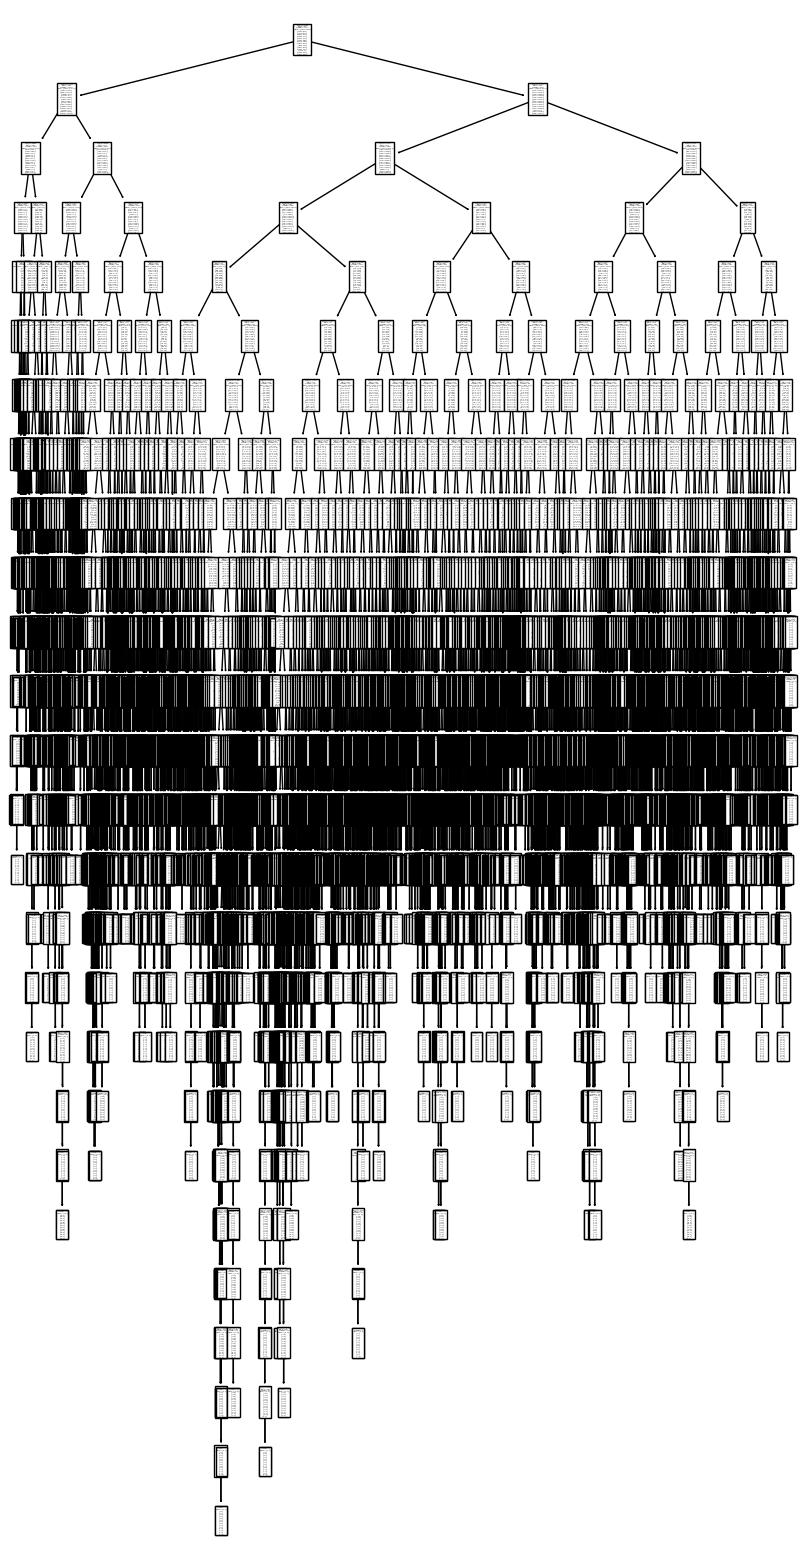

In [30]:
# Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)

# Plotting the decision tree
figure(figsize=(10, 20))
tree.plot_tree(weather_dt)

In [32]:
# Cross-validation for training accuracy
y_pred_train = weather_dt.predict(X_train)
train_accuracy = cross_val_score(weather_dt, X_train, y_train, cv=3, scoring='accuracy').mean()
print('Train accuracy score:', train_accuracy)

Train accuracy score: 0.5999302548713699


In [34]:
# Calculate and print testing accuracy
y_pred_test = weather_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test accuracy score:', test_accuracy)

Test accuracy score: 0.6270477518299059


In [40]:
# Print classification report for training data
report_train = classification_report(y_train, y_pred_train)
print("Classification Report (Training):\n", report_train)

# Print classification report for testing data
report_test = classification_report(y_test, y_pred_test)
print("Classification Report (Testing):\n", report_test)

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4264
           1       1.00      1.00      1.00      6030
           2       1.00      1.00      1.00      5593
           3       1.00      1.00      1.00      3358
           4       1.00      1.00      1.00      3703
           5       1.00      1.00      1.00      3791
           6       1.00      1.00      1.00      2851
           7       1.00      1.00      1.00      4833
           8       1.00      1.00      1.00      3590
           9       1.00      1.00      1.00      7677
          10       1.00      1.00      1.00      3575
          11       1.00      1.00      1.00      2720
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2922
          14       1.00      1.00      1.00       898

   micro avg       1.00      1.00      1.00     55805
   macro avg       0.93      0.93      0.93  

C:\Users\isaac\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\isaac\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\isaac\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\isaac\anaconda3\Lib\site-package

In [45]:
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


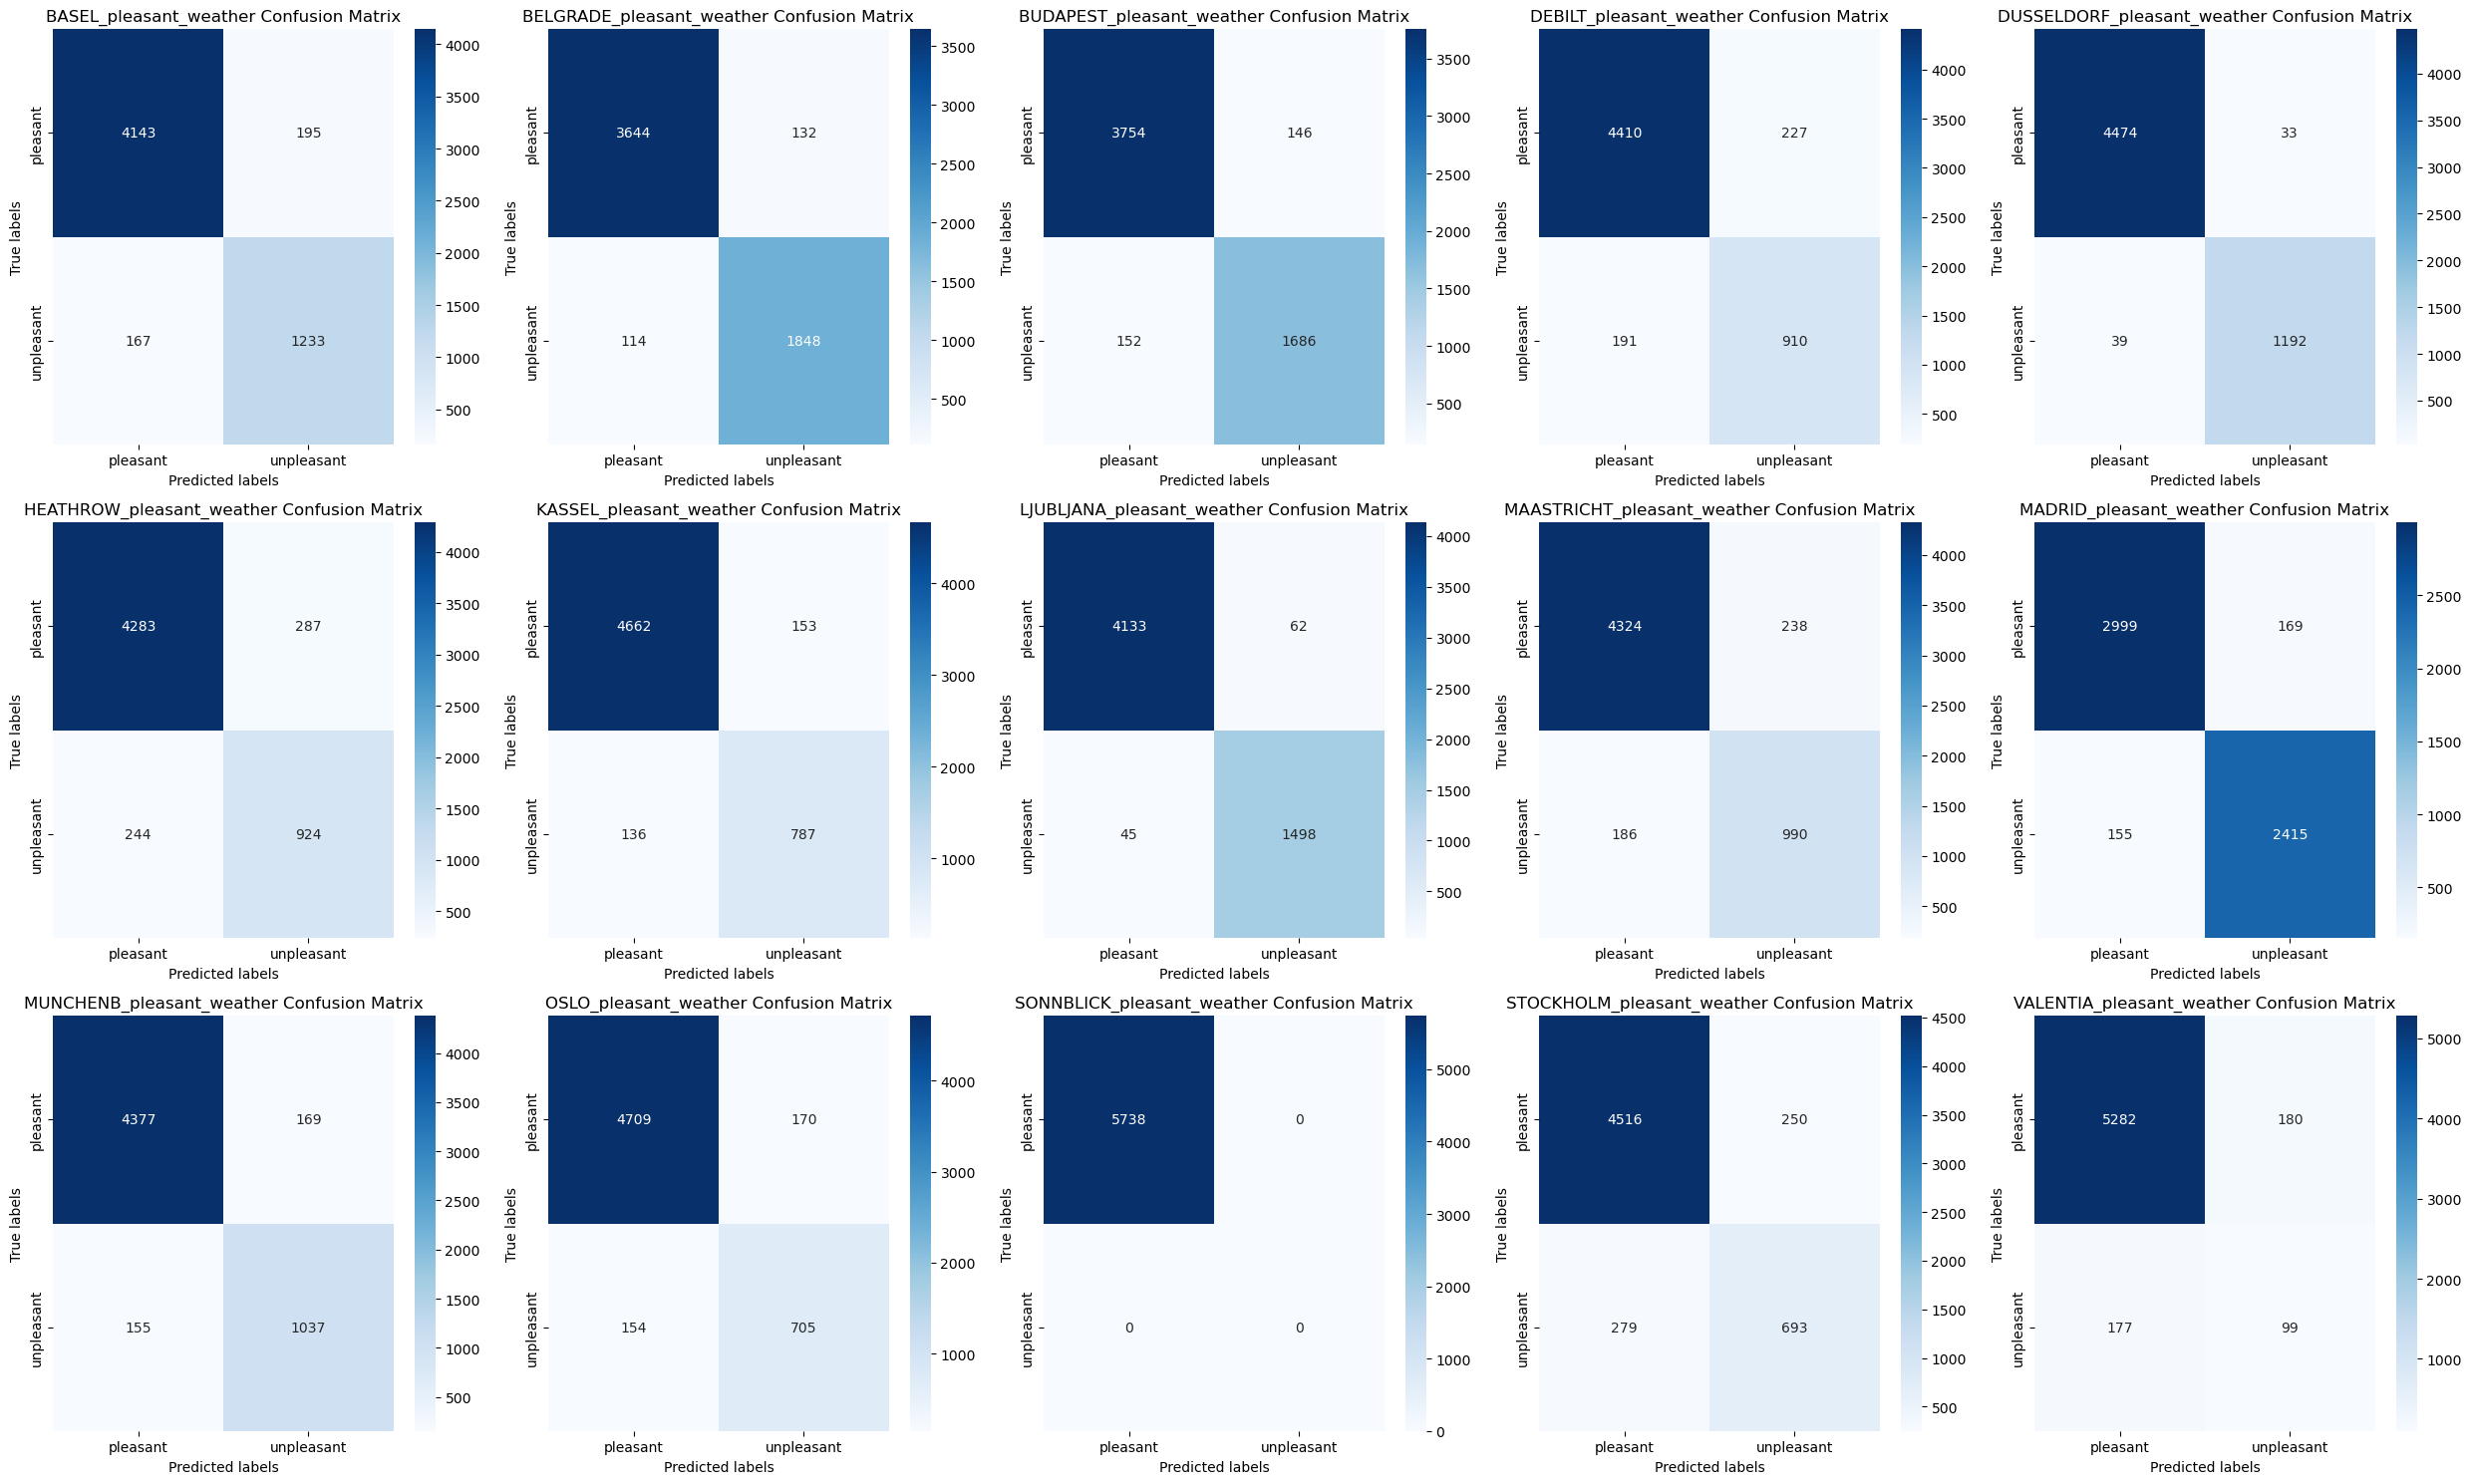

In [52]:
# Define all necessary labels and settings
labels = ['pleasant', 'unpleasant']
fig, ax = plt.subplots(3, 5, figsize=(25, 15))  # Adjust as needed
count = 0

# Loop to generate confusion matrices for each weather metric column in y_test
for i in range(3):
    for j in range(5):
        if count < len(y_test.columns):  # Ensure we don’t exceed the number of classes
            column_name = y_test.columns[count]  # Access full column names directly
            cm = confusion_matrix(y_test[column_name], y_pred_test[:, count], labels=[0, 1])  # Use correct labels
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(f'{column_name} Confusion Matrix')  # Use full column name in title
            ax[i, j].xaxis.set_ticklabels(labels)
            ax[i, j].yaxis.set_ticklabels(labels)
            count += 1

# Save the figure
output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\1.5 Task\confusion_matrices.png'
plt.tight_layout()
plt.savefig(output_path)
plt.show()

The Decision Tree model shows promise, it seems overly complex and may need simplification. The model performs almost perfectly on the training data but struggles to maintain accuracy with new, unseen data—suggesting it has overfitted, capturing excessive details from the training set rather than general patterns. Pruning, by limiting the tree’s depth or requiring more samples per split, could help balance this by simplifying the model to improve its accuracy in predicting pleasant weather across different datasets.